Origin Point:  [  0.36858759  -0.36858759   0.3347907  -86.23561789  39.78811678]
RMSE:  [0.81231998 0.95050615]


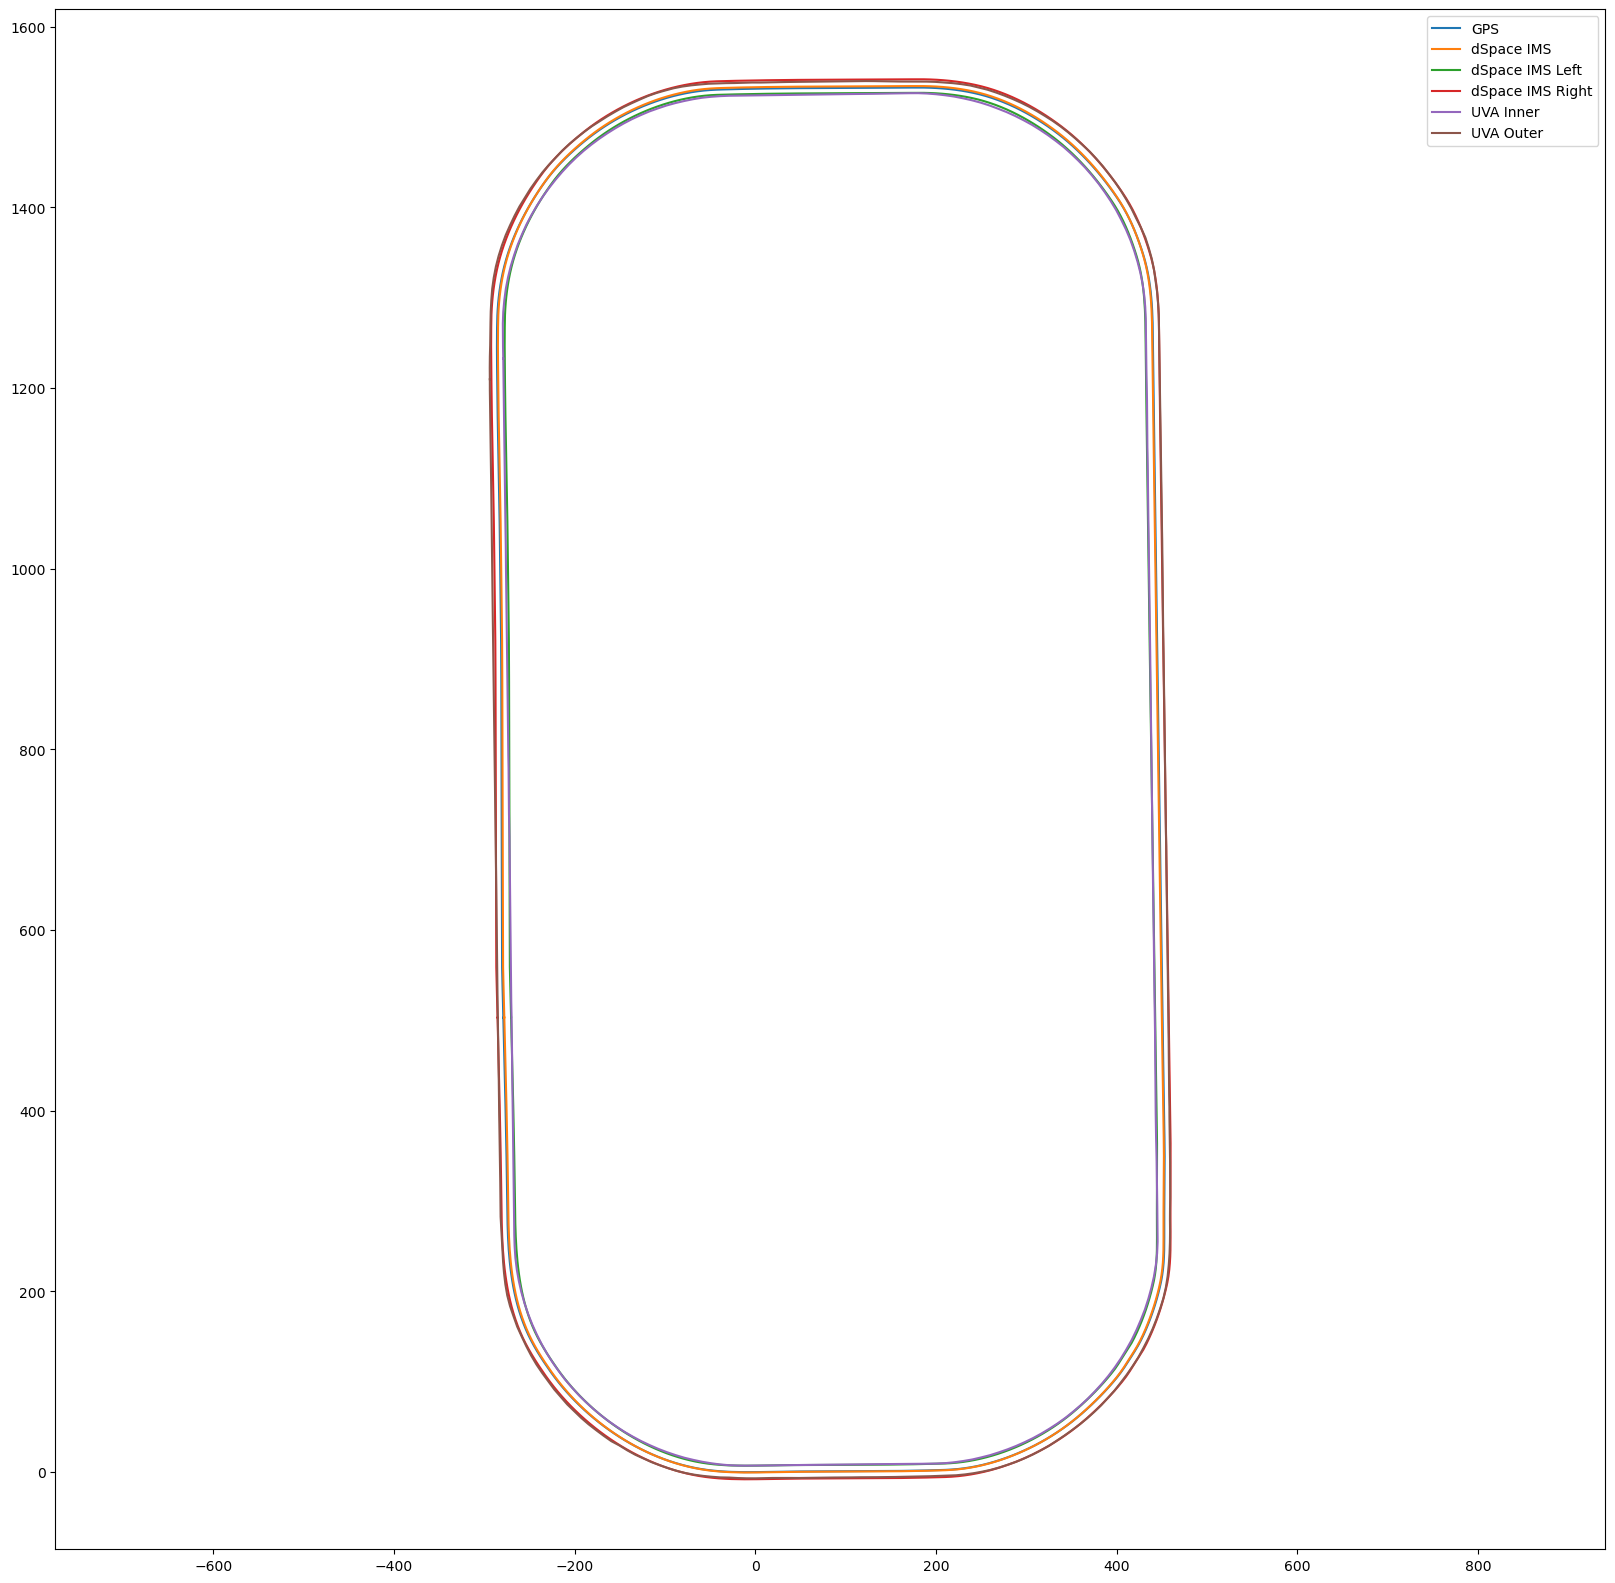

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import pygeodesy

dspace_ims = np.loadtxt('IMS.csv', delimiter=',', skiprows=1)
uva_inner = np.loadtxt('IMS_inner.csv', delimiter=',')
uva_outer = np.loadtxt('IMS_outer.csv', delimiter=',')

idx = np.argmin(np.abs(dspace_ims[:, 6])+np.abs(dspace_ims[:, 7]))

# Interpolate GPS data to get Origin Point
#GPS Origin:  [39.78811678469665, -86.23561788553697, 0.33479060109880493]


abscissa = np.sum(dspace_ims[idx-10:idx+10,6:8],axis=1)
spline = make_interp_spline(abscissa, dspace_ims[idx-10:idx+10,6:], k=3)
origin_point = spline(0)
print('Origin Point: ', origin_point)

gps_origin = [39.78811678469665, -86.23561788553697, 0.33479060109880493]

# Convert dSpace IMS to GPS and Compare
# Convert UVA to XYZ
gps_map = pygeodesy.LocalCartesian(gps_origin[0], gps_origin[1], gps_origin[2])
gps_points = np.zeros((dspace_ims.shape[0], 2))
uva_inner_gps_points = np.zeros((uva_inner.shape[0], 2))
uva_outer_gps_points = np.zeros((uva_outer.shape[0], 2))
for i in range(dspace_ims.shape[0]):
    local_tuple = gps_map.forward(dspace_ims[i, 10], dspace_ims[i, 9], 0)
    gps_points[i, 0] = local_tuple[0]
    gps_points[i, 1] = local_tuple[1]
for i in range(uva_inner.shape[0]):
    local_tuple = gps_map.forward(uva_inner[i, 0], uva_inner[i, 1], 0)
    uva_inner_gps_points[i, 0] = local_tuple[0]
    uva_inner_gps_points[i, 1] = local_tuple[1]
for i in range(uva_outer.shape[0]):
    local_tuple = gps_map.forward(uva_outer[i, 0], uva_outer[i, 1], 0)
    uva_outer_gps_points[i, 0] = local_tuple[0]
    uva_outer_gps_points[i, 1] = local_tuple[1]

# RMSE of GPS and dSpace IMS
rmse = np.sqrt(np.mean((gps_points - dspace_ims[:, 6:8])**2, axis=0))
print('RMSE: ', rmse)

# Plot
plt.figure(figsize = (20,20))
plt.plot(gps_points[:,0], gps_points[:,1], label='GPS')
plt.plot(dspace_ims[:, 6], dspace_ims[:, 7], label='dSpace IMS')
plt.plot(dspace_ims[:,0], dspace_ims[:,1], label='dSpace IMS Left')
plt.plot(dspace_ims[:,3], dspace_ims[:,4], label='dSpace IMS Right')
plt.plot(uva_inner_gps_points[:,0], uva_inner_gps_points[:,1], label='UVA Inner')
plt.plot(uva_outer_gps_points[:,0], uva_outer_gps_points[:,1], label='UVA Outer')

plt.axis('equal')
plt.legend()
plt.show()



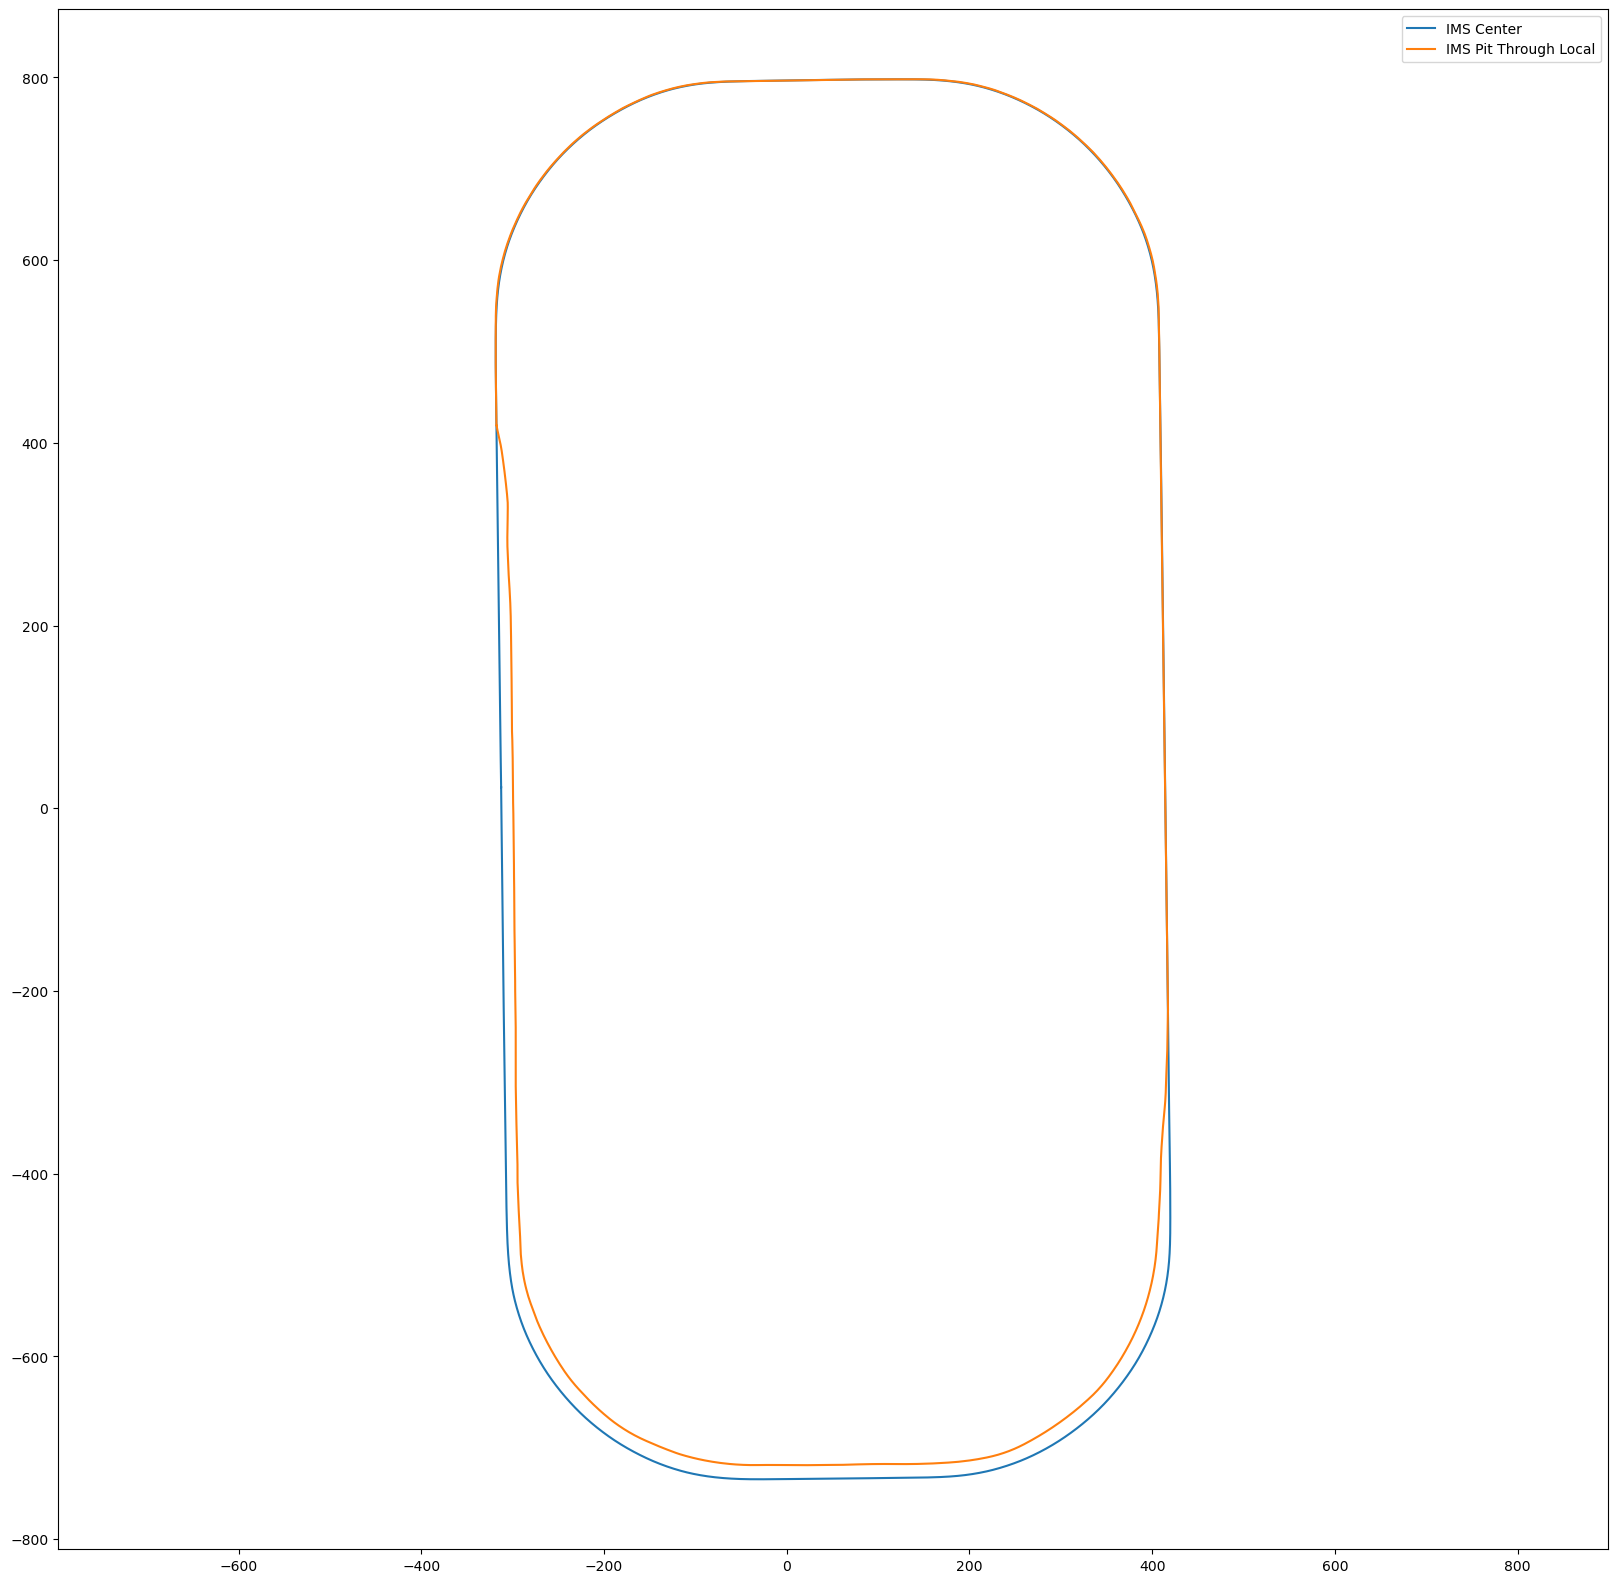

In [64]:
ims_pit = np.loadtxt('IMS_pit_through.csv', delimiter=',')
uva_center_line = np.loadtxt(f'../maps/ims/center_line.csv', delimiter=',')

# Check PitLane
# UVA GPS Origin
gps_origin = [39.7947350319205384, -86.2352425671970906, 0.0]
gps_map = pygeodesy.LocalCartesian(gps_origin[0], gps_origin[1], gps_origin[2])
for i in range(ims_pit.shape[0]):
    local_tuple = gps_map.forward(ims_pit[i, 0], ims_pit[i, 1], 0)
    ims_pit[i, 0] = local_tuple[0]
    ims_pit[i, 1] = local_tuple[1]


# Plot
plt.figure(figsize = (20,20))
plt.plot(uva_center_line[:, 0], uva_center_line[:, 1], label='IMS Center')
plt.plot(ims_pit[:,0], ims_pit[:,1], label='IMS Pit Through Local')
plt.axis('equal')
plt.legend()
plt.show()

# Save to file
pit_lane = np.zeros((ims_pit.shape[0], 4))
pit_lane[:, 0:2] = ims_pit
np.savetxt('pit_lane.csv', pit_lane, delimiter=',', fmt='%0.8f')

## Conclusion

GPS Bounds are extremely close to google maps, lidar wall detection derived bounds. Can use the racelines derived from team's own gps origin without issue.